In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
item_c= pd.read_csv('./data/item_categories.csv') # 아이템 카테고리 / ID c : item_category_name, item_category_id
item= pd.read_csv('./data/items.csv') # 카테고리, 아이디, 이름 c: item_name, item_id, item_category_id
train_sale= pd.read_csv('./data/sales_train.csv')  # train data c : data, date_block_num, shop_id,item_id,item_price,item_cnt_day
# item_cnt_day를 예측
sample_sub = pd.read_csv('./data/sample_submission.csv') # 
shop= pd.read_csv('./data/shops.csv') # 상점 이름, ID c : show_name,show_id
test= pd.read_csv('./data/test.csv') # 각 상점마다 세일을 어떻게 하는지, 어떤 품목을 세일하는지 c : ID, shop_id,item_id

In [6]:
train_N=pd.merge(train_sale,item)

In [77]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


- 이상치

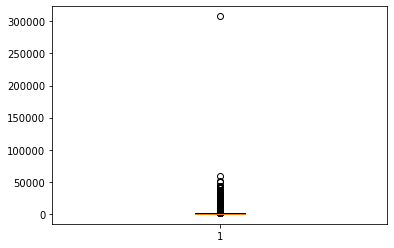

In [4]:
plt.boxplot(train_sale.item_price)
plt.show()

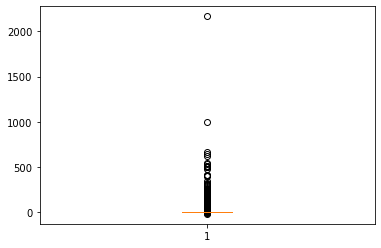

In [6]:
plt.boxplot(train_sale.item_cnt_day)
plt.show()

In [35]:
train_N[train_N.item_cnt_day > 900]
# 문제 지점으로 배송(Boxberry)
# 기업 패키지 티셔츠 1C 관심 화이트(34*42)...

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
1181188,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9
1494614,15.01.2015,24,12,20949,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71


In [34]:
len(train_N[train_N.item_cnt_day > 200])

# 문제 지점으로 배송(Boxberry)
# 기업 패키지 티셔츠 1C 관심 흰색(34*42)...
# 기업패키지 티셔츠 1C 관심화이트(34*42)...
# iTunes 1500 문지름.
# 티켓 "IgroMir 2014"(1일 동안(별도 -...
# 중간계: 모르도르의 그림자 [PC 디지털] 
# Grand Theft Auto V [PC, 러시아어 자막]
# 티켓 "IgroMir 2015" - 2015년 10월 3일(웹사이트) U...
# 티켓 "IgroMir 2015" - 2015년 10월 3일(웹사이트) U...
# 티켓 "IgroMir 2015" - 2015년 10월 3일(웹사이트) [...
# 티켓 "IgroMir 2015" - 2015년 10월 3일(웹사이트) [...

38

In [37]:
train_N[train_N.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
60,05.01.2013,0,25,2552,899.0,-1.0,DEEP PURPLE The House Of Blue Light LP,58
64,14.05.2013,4,6,2552,949.0,-1.0,DEEP PURPLE The House Of Blue Light LP,58
1985,07.07.2014,18,31,2574,399.0,-1.0,DEL REY LANA Born To Die The Paradise Editio...,55
2543,26.06.2015,29,16,2574,449.0,-1.0,DEL REY LANA Born To Die The Paradise Editio...,55
2557,11.07.2015,30,42,2574,449.0,-1.0,DEL REY LANA Born To Die The Paradise Editio...,55
...,...,...,...,...,...,...,...,...
2934862,25.10.2015,33,48,5908,3199.0,-1.0,"Pro Evolution Soccer 2016 [Xbox 360, русские с...",23
2935309,31.10.2015,33,47,4056,2999.0,-1.0,"Just Dance 2016. Unlimited [Xbox One, русская ...",24
2935585,14.10.2015,33,9,18103,3799.0,-1.0,Рюкзак Batman With Logo с капюшоном,61
2935731,04.10.2015,33,9,21036,1899.0,-1.0,Футболка Bloodborne Bossfight White L,61


In [38]:
train_N[train_N.item_id == 13476]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
2935837,05.10.2015,33,25,13476,7998.0,-1.0,Комплект «Sony PS3 (320 Gb) (CECH-2508B)» + иг...,11
2935838,08.10.2015,33,25,13476,7998.0,1.0,Комплект «Sony PS3 (320 Gb) (CECH-2508B)» + иг...,11
2935839,02.10.2015,33,25,13476,7998.0,1.0,Комплект «Sony PS3 (320 Gb) (CECH-2508B)» + иг...,11


In [50]:
train_N[train_N.item_price > 50000  train_N.item_cnt_day > 100].index

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [53]:
train_N.any(train_N.item_price > 50000)

TypeError: unhashable type: 'Series'

In [46]:
train_N.drop(train_N[train_N.item_price > 50000].index,axis = 0)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,"АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)",40
2935845,01.10.2015,33,25,7903,12198.0,1.0,XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


In [23]:
len(train_sale[train_sale.item_price > 40000])

14

In [20]:
train_N=pd.merge(train_sale,item)

In [22]:
train_N[train_N.item_price > 50000]
# 배송(EMS)
# RADMIN 3 (프로그램)
# 수집용 체스(반지의 제왕)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
1180083,17.09.2013,8,12,11365,59200.0,1.0,Доставка (EMS),9
2163826,13.12.2013,11,12,6066,307980.0,1.0,Radmin 3 - 522 лиц.,75
2294618,20.03.2014,14,25,13199,50999.0,1.0,Коллекционные шахматы (Властелин Колец),69


In [30]:
train_N[train_N.item_price > 40000]

# 프록시 및 방화벽 6.X 최대 100개 세션 
# 라이선스 1C-Bitrix: 사이트 관리 - 전문가
# 필터 모듈이 있는 UserGate 프록시 및 방화벽
# Microsoft Xbox One 1TB

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
1180083,17.09.2013,8,12,11365,59200.0,1.0,Доставка (EMS),9
1962819,24.10.2013,9,12,7238,42000.0,1.0,UserGate Proxy & Firewall 6.X до 100 сессий,75
2163826,13.12.2013,11,12,6066,307980.0,1.0,Radmin 3 - 522 лиц.,75
2294618,20.03.2014,14,25,13199,50999.0,1.0,Коллекционные шахматы (Властелин Колец),69
2712195,20.11.2014,22,12,14173,40900.0,1.0,Лицензия 1С-Битрикс: Управление сайтом - Эксперт,75
2771879,29.01.2015,24,12,7241,49782.0,1.0,UserGate Proxy & Firewall 6.X с модулем фильтр...,75
2934252,23.10.2015,33,42,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2934256,20.10.2015,33,38,13403,41990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2934257,20.10.2015,33,12,13403,41990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16
2934258,29.10.2015,33,12,13403,42990.0,1.0,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16


- 중복값

In [17]:
pd.concat([train_sale[train_sale.duplicated(keep = 'first')],train_sale[train_sale.duplicated(keep = 'last')]]).sort_index()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [18]:
train_N = train_N.drop(train_N[train_N.duplicated()].index,axis = 0)

In [20]:
train_N

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,"АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)",40
2935845,01.10.2015,33,25,7903,12198.0,1.0,XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


ValueError: Can only compare identically-labeled Series objects

In [28]:
train_N.drop(train_N[train_N.item_cnt_day < 0].index())

TypeError: 'Int64Index' object is not callable

In [16]:
pd.concat([train_sale[train_sale.duplicated(keep = 'first')],train_sale[train_sale.duplicated(keep = 'last')]]).sort_index()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [5]:
train_sale.duplicated(keep = 'last')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
2198564,31.12.2014,23,42,21619,499.0,1.0


In [56]:
from datetime import datetime

In [64]:
print(datetime.strptime(dddddddddd,'%d.%m.%Y'))

2013-01-02 00:00:00


In [85]:
train_D.date[0].month

1

In [83]:
datetime.month

<attribute 'month' of 'datetime.date' objects>

In [60]:
dddddddddd = train_sale.date[0]
dddddddddd

'02.01.2013'

In [65]:
train_D = train_sale

In [68]:
train_D.date = train_D.date.apply(lambda x : datetime.strptime(x,'%d.%m.%Y'))
train_D

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler,OneHotEncoder, LabelEncoder

In [16]:
sts=StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()
rbs = RobustScaler()
ohe = OneHotEncoder()
lbe = LabelEncoder()

In [54]:
train_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [95]:
k = train_D[train_D.item_cnt_day < 0]
k

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [109]:
train_D.shop_id == k.iloc[0,2] and train_D.item_id == k.iloc[0,3]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [127]:
train_D.shop_id == k.iloc[0,2] +  train_D.item_id == k.iloc[0,3]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [141]:
train_D[np.array(train_D.item_id == k.iloc[0,3]) & np.array(train_D.shop_id == k.iloc[0,2])]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [206]:
def COTOS(x):
    a = (train_F[np.array(train_F.item_id == k.iloc[x,3]) & np.array(train_F.shop_id == k.iloc[x,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[x,5]))].date - k.iloc[x,0]).abs()
    h = a[a==a.min()].index[0]
    train_F.iloc[h,5] += k.iloc[x,5]
    train_F.iloc[h,5]

In [214]:
for i in range(len(k)):
    COTOS(i)
    print(i)
train_F

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


IndexError: index 0 is out of bounds for axis 0 with size 0

In [237]:
a = (train_F[np.array(train_F.item_id == k.iloc[48,3]) & np.array(train_F.shop_id == k.iloc[48,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[48,5]))].date - k.iloc[48,0])
h = a[a==a.min()].index[0]
train_F.iloc[h,5] += k.iloc[48,5]
train_F.iloc[h,5]

0.0

In [249]:
qwe = 0
for i in range(len(k)):
    try:
        a = (train_F[np.array(train_F.item_id == k.iloc[i,3]) & np.array(train_F.shop_id == k.iloc[i,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[i,5]))].date - k.iloc[i,0])
        h = a[a == a.min()].index[0]
        print(h)
        print(qwe)
        qwe += 1
    except:
        pass

1
0
408
1
174
2
808
3
1053
4
347638
5
1744
6
1827
7
2410
8
353389
9
3385
10
3430
11
3493
12
3531
13
3755
14
4308
15
4674
16
4798
17
4926
18
4949
19
5107
20
5497
21
795398
22
7138
23
7173
24
7276
25
854058
26
380030
27
380288
28
7869
29
8003
30
8199
31
8500
32
8973
33
9509
34
159379
35
10091
36
515655
37
10456
38
10594
39
159567
40
10829
41
11266
42
11409
43
13632
44
13894
45
14075
46
15117
47
15194
48
16343
49
17181
50
17571
51
17957
52
18178
53
18195
54
18550
55
18879
56
215474
57
19762
58
21508
59
23060
60
23218
61
23267
62
23388
63
23825
64
24503
65
25828
66
26527
67
27270
68
27381
69
27512
70
27689
71
28112
72
29010
73
30335
74
30717
75
32084
76
32461
77
32689
78
32746
79
32776
80
34095
81
823701
82
34518
83
34520
84
35640
85
35737
86
35810
87
36307
88
36985
89
37129
90
37328
91
37374
92
37536
93
45199
94
45424
95
45415
96
150574
97
880900
98
46004
99
144472
100
46685
101
46752
102
47148
103
47451
104
47596
105
49096
106
49147
107
49208
108
49450
109
49718
110
49889
111
50019
112
5

301795
808
301846
809
301912
810
175600
811
59115
812
59133
813
175831
814
175644
815
301865
816
176618
817
58337
818
305637
819
17356
820
18485
821
15826
822
28578
823
310839
824
311669
825
312714
826
214568
827
215136
828
313329
829
313369
830
82964
831
313813
832
218987
833
218995
834
314755
835
20466
836
20576
837
19773
838
216110
839
215736
840
20405
841
18877
842
1515
843
1827
844
1676
845
6401
846
2103
847
322563
848
322822
849
152502
850
12302
851
153485
852
152650
853
565
854
324226
855
318565
856
23407
857
206265
858
205589
859
326302
860
326442
861
26248
862
326468
863
205431
864
25611
865
326803
866
25737
867
4006
868
329085
869
24824
870
4987
871
331916
872
333803
873
334097
874
77964
875
337205
876
337566
877
337725
878
337744
879
338339
880
338455
881
338758
882
30688
883
30302
884
163013
885
30240
886
827933
887
341290
888
341562
889
32763
890
342046
891
342863
892
77625
893
343493
894
133635
895
343997
896
344205
897
573101
898
164927
899
1534
900
1289
901
1204
902
553

538001
1528
16077
1529
6140
1530
643407
1531
23104
1532
646166
1533
26179
1534
183823
1535
648187
1536
558124
1537
558875
1538
106648
1539
558948
1540
436040
1541
108036
1542
560301
1543
249994
1544
188147
1545
64591
1546
64955
1547
654447
1548
215256
1549
64879
1550
63655
1551
421988
1552
317945
1553
222604
1554
657417
1555
541713
1556
537333
1557
60380
1558
658690
1559
62300
1560
659289
1561
217277
1562
659905
1563
65820
1564
565518
1565
176614
1566
176646
1567
301873
1568
58519
1569
58524
1570
176271
1571
370827
1572
59002
1573
566225
1574
662347
1575
47150
1576
47267
1577
381485
1578
666600
1579
666554
1580
667148
1581
147760
1582
830568
1583
164780
1584
573476
1585
573441
1586
670453
1587
164268
1588
670683
1589
374783
1590
33726
1591
339423
1592
525181
1593
167333
1594
167560
1595
30757
1596
30757
1597
576491
1598
367399
1599
576491
1600
576491
1601
32987
1602
33917
1603
34414
1604
168312
1605
35436
1606
167930
1607
373971
1608
171927
1609
37092
1610
172949
1611
353046
1612
35132

845804
2235
110740
2236
110740
2237
91840
2238
940933
2239
1253339
2240
729032
2241
620229
2242
91810
2243
114999
2244
197191
2245
233802
2246
944156
2247
111502
2248
875234
2249
875234
2250
945373
2251
945436
2252
825996
2253
30757
2254
167126
2255
62194
2256
237814
2257
947264
2258
32632
2259
32651
2260
821915
2261
876147
2262
949756
2263
572988
2264
950789
2265
106336
2266
247701
2267
476606
2268
765232
2269
765437
2270
76749
2271
79787
2272
959296
2273
75255
2274
140523
2275
84727
2276
960318
2277
85158
2278
85152
2279
85192
2280
86460
2281
87614
2282
626739
2283
131468
2284
261816
2285
85336
2286
66070
2287
477750
2288
963775
2289
424908
2290
242048
2291
781822
2292
964852
2293
61345
2294
965800
2295
82936
2296
965840
2297
83025
2298
966160
2299
20558
2300
967153
2301
967325
2302
810572
2303
448250
2304
841128
2305
275902
2306
839607
2307
730908
2308
971912
2309
850272
2310
972026
2311
972139
2312
265015
2313
850480
2314
759041
2315
270460
2316
853790
2317
853790
2318
94757
2319
9

1101302
2927
1219742
2928
78609
2929
610427
2930
79199
2931
997465
2932
134073
2933
263203
2934
1102961
2935
930434
2936
1224588
2937
694499
2938
336555
2939
341037
2940
1002341
2941
336364
2942
1229593
2943
709182
2944
508371
2945
1231090
2946
771824
2947
1049041
2948
651848
2949
1233290
2950
106861
2951
229034
2952
1044068
2953
419205
2954
482151
2955
561862
2956
953881
2957
70257
2958
1235870
2959
562631
2960
1236043
2961
1047397
2962
1237260
2963
1049686
2964
463822
2965
102515
2966
102264
2967
937917
2968
107858
2969
779685
2970
102764
2971
102915
2972
1241622
2973
1242076
2974
71675
2975
60958
2976
60995
2977
189266
2978
63058
2979
62967
2980
1244639
2981
1245026
2982
1244713
2983
956139
2984
785304
2985
785358
2986
183758
2987
1046211
2988
1045038
2989
92881
2990
846011
2991
1252324
2992
1252424
2993
847448
2994
1121506
2995
1254829
2996
758024
2997
758024
2998
88026
2999
522215
3000
853000
3001
1256598
3002
1108728
3003
853707
3004
1257668
3005
1257680
3006
1258456
3007
971879


718932
3600
102989
3601
107670
3602
1044068
3603
1044017
3604
1238550
3605
1238550
3606
438079
3607
104286
3608
1047803
3609
933608
3610
1319288
3611
102489
3612
1447558
3613
1447588
3614
1284161
3615
259978
3616
80851
3617
770477
3618
1103066
3619
1288428
3620
931638
3621
74620
3622
74606
3623
74351
3624
75408
3625
1214523
3626
1280754
3627
733071
3628
404814
3629
1215589
3630
1099130
3631
1102855
3632
260210
3633
1104280
3634
616082
3635
616169
3636
1455951
3637
918459
3638
917520
3639
1287705
3640
1228568
3641
402194
3642
1228568
3643
840086
3644
91079
3645
90423
3646
399324
3647
843117
3648
842409
3649
254691
3650
1462955
3651
1463735
3652
845234
3653
1464293
3654
1253538
3655
941811
3656
1466356
3657
1108273
3658
473880
3659
1119807
3660
265310
3661
89560
3662
1256610
3663
853012
3664
1470502
3665
265815
3666
1435848
3667
1255071
3668
1121513
3669
1471765
3670
1436931
3671
1453090
3672
614685
3673
260403
3674
261147
3675
1228035
3676
80359
3677
1442602
3678
78288
3679
1442548
3680

4269
52062
4270
1662812
4271
1173127
4272
1083863
4273
1746974
4274
1427840
4275
141224
4276
1556497
4277
1203273
4278
1093760
4279
136770
4280
1276246
4281
1555653
4282
1751279
4283
1751367
4284
1751476
4285
959991
4286
1752086
4287
87157
4288
1752684
4289
1318548
4290
1434076
4291
1207283
4292
1435802
4293
95077
4294
1755364
4295
1755472
4296
97938
4297
975992
4298
98170
4299
1420778
4300
272002
4301
338420
4302
335435
4303
1758527
4304
709612
4305
611021
4306
333018
4307
1222765
4308
335188
4309
335187
4310
499362
4311
1551572
4312
772345
4313
1685370
4314
1685496
4315
1486342
4316
1562211
4317
259834
4318
600763
4319
80573
4320
718932
4321
201695
4322
107596
4323
107472
4324
1768550
4325
1531184
4326
105489
4327
559159
4328
1444487
4329
1619673
4330
1112363
4331
197811
4332
1771079
4333
1771148
4334
439079
4335
1532505
4336
900115
4337
73230
4338
414177
4339
246794
4340
1232747
4341
72904
4342
887372
4343
418914
4344
1778153
4345
1472025
4346
853594
4347
1121804
4348
93762
4349
972

2013603
4937
1163072
4938
1829640
4939
1163157
4940
2014041
4941
1650819
4942
332313
4943
337737
4944
1838413
4945
1098322
4946
1895093
4947
997316
4948
994111
4949
1562565
4950
1279980
4951
1757644
4952
1558061
4953
1563095
4954
140509
4955
253844
4956
2018681
4957
1559018
4958
78360
4959
922561
4960
1680096
4961
1895554
4962
86083
4963
130751
4964
765511
4965
1907644
4966
1448632
4967
1765942
4968
1684328
4969
1288047
4970
1288205
4971
1454566
4972
1684662
4973
1845616
4974
134709
4975
1813852
4976
1091062
4977
1950327
4978
2029638
4979
1949862
4980
26497
4981
914227
4982
65710
4983
65732
4984
1050588
4985
20038
4986
2034523
4987
1619104
4988
533196
4989
965942
4990
1032219
4991
2034674
4992
2034868
4993
2001814
4994
446963
4995
64252
4996
313201
4997
1715106
4998
2038124
4999
1490741
5000
320151
5001
1990657
5002
992162
5003
2038484
5004
1576074
5005
331654
5006
906920
5007
1038375
5008
1494487
5009
2039060
5010
1378478
5011
1494482
5012
1635453
5013
1635398
5014
1489524
5015
204199

5597
2285971
5598
1168346
5599
825357
5600
162908
5601
2152839
5602
2152757
5603
2154372
5604
2154307
5605
2152754
5606
1955823
5607
2154162
5608
2053231
5609
2154575
5610
2055437
5611
2150663
5612
875760
5613
2150713
5614
1190976
5615
342707
5616
2289449
5617
2290034
5618
1954248
5619
1708866
5620
2160816
5621
29635
5622
1018625
5623
905842
5624
2163424
5625
2159450
5626
362073
5627
1951550
5628
2160014
5629
774594
5630
2025479
5631
1223233
5632
80054
5633
74046
5634
1226509
5635
2023816
5636
2301734
5637
1561389
5638
2302265
5639
1890060
5640
80163
5641
2138423
5642
2307413
5643
2307921
5644
2168727
5645
156958
5646
2310908
5647
982657
5648
2170603
5649
598479
5650
2170678
5651
2170927
5652
9056
5653
1987680
5654
2171606
5655
2318778
5656
213814
5657
1141227
5658
2037626
5659
2320517
5660
2175600
5661
2038495
5662
2175617
5663
210526
5664
2321142
5665
156089
5666
2176178
5667
1989665
5668
904917
5669
2012571
5670
2271032
5671
2258668
5672
2326583
5673
2144094
5674
2257154
5675
56897


6246
2107624
6247
1518802
6248
2493890
6249
2113465
6250
2494179
6251
2494536
6252
73822
6253
1996255
6254
1693077
6255
648022
6256
1385245
6257
2426069
6258
2181667
6259
2497640
6260
2244972
6261
899939
6262
199785
6263
105671
6264
2091257
6265
2182322
6266
2301289
6267
2068369
6268
2301077
6269
2501596
6270
2301910
6271
1560436
6272
2502700
6273
260241
6274
259853
6275
1474448
6276
1845616
6277
2024700
6278
505799
6279
1486410
6280
130189
6281
130597
6282
1283341
6283
1559292
6284
79072
6285
2221657
6286
2507373
6287
2019470
6288
338663
6289
2212339
6290
2016182
6291
1478260
6292
2208760
6293
404814
6294
333645
6295
2135412
6296
1756767
6297
1756999
6298
1756960
6299
1973371
6300
1674790
6301
1973784
6302
1826400
6303
2441467
6304
2080671
6305
2129572
6306
2223550
6307
1208713
6308
1826517
6309
85746
6310
85391
6311
2126902
6312
2137516
6313
76223
6314
2082063
6315
2124070
6316
2124099
6317
2445650
6318
87267
6319
1197592
6320
2127600
6321
82105
6322
86646
6323
1203451
6324
2328412
6

2371581
6902
60282
6903
658690
6904
21962
6905
122902
6906
2776930
6907
2486494
6908
103643
6909
2103395
6910
1689394
6911
2736903
6912
2189367
6913
2778734
6914
2779197
6915
88596
6916
2416460
6917
2583597
6918
2098004
6919
2597803
6920
2193601
6921
2366975
6922
1250226
6923
1878538
6924
2114598
6925
2667910
6926
2738969
6927
1044432
6928
2783505
6929
2666367
6930
2785492
6931
2785602
6932
1966682
6933
2678484
6934
1966758
6935
2741430
6936
2427221
6937
1792054
6938
2666736
6939
1965889
6940
2789783
6941
2017410
6942
1474649
6943
410871
6944
2394707
6945
332404
6946
2594993
6947
2017105
6948
2208560
6949
332894
6950
1553281
6951
259864
6952
769846
6953
2383755
6954
504184
6955
2217655
6956
2748348
6957
1469746
6958
1611268
6959
2675877
6960
1698836
6961
2188667
6962
2647203
6963
1441374
6964
2278627
6965
2512003
6966
2701422
6967
2802400
6968
1211289
6969
1901906
6970
979148
6971
2084760
6972
1973146
6973
1742245
6974
1062973
6975
45568
6976
2698147
6977
58546
6978
370907
6979
2533961

In [250]:
qwe,len(k)

(7289, 7356)

In [321]:
import time

# 환불 적용 모듈

- Series는 and. or 연산자가 되지 않아서 각 조건들을 np.array로 변환하여 적용
- sales 데이터 중 item_id shop_id 같은것들을 추출

In [352]:
### 환불 적용 모듈
train_F = train_D.copy()
k = train_F[train_F.item_cnt_day < 0]
qwe = 0
minimum = 0
timefunc = time.time()
for i in range(len(k)):
    try:
        if k.iloc[i,5] < minimum:
            minimum = k.iloc[i,5]
        a = (train_F[np.array(train_F.item_id == k.iloc[i,3]) & np.array(train_F.shop_id == k.iloc[i,2])])
        if a.date.min() < k.iloc[i,0]:
            h = a[a.date==a.date[a.date < k.iloc[i,0]].max()].index[0]
            qwe += 1
            train_F.loc[h,'item_cnt_day'] += k.iloc[i,5]
#            if qwe == 5:
#                break
        else:
            pass
    except:
        pass
train_F.drop(k.index,axis = 0,inplace = True)
print(len(k))
print('필요 없는 값:',(len(k) - qwe))
print('적용한 값의 수::',qwe)
print(minimum)
print(time.time() - timefunc)

7356
필요 없는 값: 120
적용한 값의 수:: 7236
-22.0
228.11410522460938


# location

In [399]:
shop.location = shop.shop_name.apply(lambda x: x.split()[0])

In [393]:
shop['location']

0              !Якутск
1              !Якутск
2               Адыгея
3             Балашиха
4             Волжский
5              Вологда
6              Воронеж
7              Воронеж
8              Воронеж
9             Выездная
10           Жуковский
11           Жуковский
12    Интернет-магазин
13              Казань
14              Казань
15              Калуга
16             Коломна
17          Красноярск
18          Красноярск
19               Курск
20              Москва
21              Москва
22              Москва
23              Москва
24              Москва
25              Москва
26              Москва
27              Москва
28              Москва
29              Москва
30              Москва
31              Москва
32              Москва
33              Мытищи
34          Н.Новгород
35          Н.Новгород
36         Новосибирск
37         Новосибирск
38                Омск
39        РостовНаДону
40        РостовНаДону
41        РостовНаДону
42                 СПб
43         

In [400]:
shop.location

0              !Якутск
1              !Якутск
2               Адыгея
3             Балашиха
4             Волжский
5              Вологда
6              Воронеж
7              Воронеж
8              Воронеж
9             Выездная
10           Жуковский
11           Жуковский
12    Интернет-магазин
13              Казань
14              Казань
15              Калуга
16             Коломна
17          Красноярск
18          Красноярск
19               Курск
20              Москва
21              Москва
22              Москва
23              Москва
24              Москва
25              Москва
26              Москва
27              Москва
28              Москва
29              Москва
30              Москва
31              Москва
32              Москва
33              Мытищи
34          Н.Новгород
35          Н.Новгород
36         Новосибирск
37         Новосибирск
38                Омск
39        РостовНаДону
40        РостовНаДону
41        РостовНаДону
42                 СПб
43         

In [401]:
shop.location

0              !Якутск
1              !Якутск
2               Адыгея
3             Балашиха
4             Волжский
5              Вологда
6              Воронеж
7              Воронеж
8              Воронеж
9             Выездная
10           Жуковский
11           Жуковский
12    Интернет-магазин
13              Казань
14              Казань
15              Калуга
16             Коломна
17          Красноярск
18          Красноярск
19               Курск
20              Москва
21              Москва
22              Москва
23              Москва
24              Москва
25              Москва
26              Москва
27              Москва
28              Москва
29              Москва
30              Москва
31              Москва
32              Москва
33              Мытищи
34          Н.Новгород
35          Н.Новгород
36         Новосибирск
37         Новосибирск
38                Омск
39        РостовНаДону
40        РостовНаДону
41        РостовНаДону
42                 СПб
43         

# location_id 만들기

In [402]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(shop.location)

LabelEncoder()

In [407]:
shop['location_id'] = le.transform(shop.location)

In [410]:
shop

,shop_name,shop_id,location,location_id
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,4
6,"Воронеж (Плехановская, 13)",6,Воронеж,5
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,5
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,5
9,Выездная Торговля,9,Выездная,6


In [316]:
i = 1
try:
    a = (train_F[np.array(train_F.item_id == k.iloc[i,3]) & np.array(train_F.shop_id == k.iloc[i,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[i,5]))])
    if a.date.min() < k.iloc[i,0]:
        h = a[a.date==a.date[a.date < k.iloc[i,0]].max()].index[0]
        qwe += 1
        train_F.loc[h,'item_cnt_day'] += k.iloc[i,5]
    else:
        pass
except:
    pass

In [309]:
train_F.iloc[147,:]

date              2013-01-20 00:00:00
date_block_num                      0
shop_id                            25
item_id                          2321
item_price                      999.0
item_cnt_day                      1.0
Name: 147, dtype: object

In [317]:
train_F.iloc[h,:]

date              2013-01-20 00:00:00
date_block_num                      0
shop_id                            25
item_id                          2321
item_price                      999.0
item_cnt_day                      0.0
Name: 147, dtype: object

In [305]:
train_F=train_D.copy()

147


In [296]:
from datetime import timedelta

In [272]:
train_F[np.array(train_F.item_id == k.iloc[48,3]) & np.array(train_F.shop_id == k.iloc[48,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[48,5]))].date

15194     2013-01-10
15195     2013-01-25
15196     2013-01-27
15197     2013-01-31
219901    2013-02-12
219902    2013-02-19
219904    2013-02-20
219912    2013-02-23
307939    2013-03-06
307949    2013-03-13
307962    2013-03-15
307963    2013-03-16
307964    2013-03-24
307987    2013-03-31
356513    2013-04-20
356521    2013-04-21
356527    2013-04-06
356528    2013-04-07
356529    2013-04-13
441888    2013-05-26
441889    2013-05-11
441890    2013-05-05
441891    2013-05-02
540368    2013-06-06
540369    2013-06-08
540370    2013-06-21
540371    2013-06-28
637664    2013-07-06
637665    2013-07-09
637666    2013-07-15
637667    2013-07-30
808081    2013-08-23
808106    2013-08-03
808107    2013-08-10
808108    2013-08-13
808109    2013-08-14
808110    2013-08-18
913987    2013-09-10
913988    2013-09-07
914046    2013-09-11
914078    2013-09-14
914079    2013-09-18
914167    2013-09-24
914169    2013-09-16
1025331   2013-10-25
1025332   2013-10-18
1025333   2013-10-04
1028240   201

In [231]:
k.iloc[48,0]

Timestamp('2013-01-02 00:00:00')

In [219]:
train_F = train_D.copy()
train_F

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [198]:
a = (train_F[np.array(train_F.item_id == k.iloc[1,3]) & np.array(train_F.shop_id == k.iloc[1,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[1,5]))].date - k.iloc[1,0]).abs()
h = a[a==a.min()].index[0]
train_F.iloc[h,5] += k.iloc[1,5]
train_F.iloc[h,5]

0.0

In [196]:
h = a[a==a.min()].index[0]
h

147

In [175]:
train_F = train_D.copy()

In [188]:
train_F[np.array(train_F.item_id == k.iloc[1,3]) & np.array(train_F.shop_id == k.iloc[1,2]) & np.array(train_F.item_cnt_day == abs(k.iloc[1,5]))]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
147,2013-01-20,0,25,2321,999.0,1.0
149,2013-01-31,0,25,2321,999.0,1.0
408,2013-01-05,0,25,2321,999.0,1.0
155098,2013-02-07,1,25,2321,999.0,1.0
155099,2013-02-25,1,25,2321,1099.0,1.0
324402,2013-03-21,2,25,2321,1099.0,1.0
324453,2013-03-19,2,25,2321,989.0,1.0
353997,2013-04-26,3,25,2321,1099.0,1.0
584374,2013-06-18,5,25,2321,698.0,1.0
584380,2013-06-22,5,25,2321,698.0,1.0
